# Set Up

In [957]:
# moduleをimport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
import warnings
from tqdm import tqdm_notebook as tqdm

In [955]:
# DFで表示する長さを指定
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 3000)

In [956]:
# Warningを非表示
warnings.filterwarnings('ignore')

# Read Files

In [39]:
# ファイルの読み出し(df_train, df_test)
df_train_raw = pd.read_csv('train.csv')
df_test_raw = pd.read_csv('test.csv')

# Items

In [5]:
# id(int):
# - use as index

In [6]:
# budget(int):
# - use as is or log scale

In [7]:
# popularity(float):
# - use as is

In [8]:
# runtime(float):
# - use as is

In [9]:
# imdb_id(str):
# - do not use

In [10]:
# original_language(str):
# - get dummies

In [11]:
# original_title(str):
# - do not use ?

In [12]:
# title(str):
# - do not use ?

In [13]:
# overview(long str):
# - extract keywords and use

In [14]:
# tagline(long str):
# - do not use ?
# - as well as title or overview

In [15]:
# status(str):
# - "Released" -> 0
# - "Rumored" -> 1

In [16]:
# homepage(link):
# - null -> 0
# - other -> 1

In [17]:
# postar_path(.jpg):
# - null -> 0 
# - other -> 1

In [18]:
# release_date(str):
# - devide into "day of week," "month," "day," and "year"

In [19]:
# belongs_to_collection(nested):
# - unfold and devide into "id," "name," "poster_path," and "backdrop_path"
# - fill value 0 for Nan and 1 for other

In [20]:
# genres(nested):
# - unfold and devide into "id" and "name"
# - get dummies on "name"

In [21]:
# production_countries(nested):
# - unfold and devide into "iso_3166_1" and "name"
# - get dummies on "iso_3166_1"

In [22]:
# spoken_languages(nested):
# - unfold and devide into "iso_639_1" and "name"
# - get dummies on "iso_639_1"

In [23]:
# production_companies(multi nested):
# - unfold and devide into "name" and "id"
# - get dummies on "name"

In [24]:
# Keywords(multi nested):
# - unfold and devide into "id" and "name"
# - get dummies on "name"

In [25]:
# cast(multi nested):
# - unfold and devide into "cast_id," "character," "credit_id," "gender," "id," "name," "order," and "profile_path"
# - get dummies on "character," "gender," "name," "order," and "profile_path"

In [26]:
# crew(multi nested):
# - unfold and devide into "credit_id," "department," "gender," "id," "job," "name," and "profile_path"
# - get dummies on "department," "gender," "job," "name," and "profile_path"

In [27]:
# revenue(int):
# - use as target

# Preprocessing

In [582]:
df_train_raw.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [740]:
class Preprocessing:
    
    def __init__(self, df):
        self.df = df.copy().set_index('id')
        
    def _status(self):
        self.df['status'] = self.df['status'].apply(lambda x: 1 if x=='Released' else 1)
        
    def _homepage(self):
        self.df.loc[~self.df['homepage'].isnull(), 'homepage'] = 1
        self.df.loc[self.df['homepage'].isnull(), 'homepage'] = 0
        
    def _poster_path(self):
        self.df.loc[~self.df['poster_path'].isnull(), 'poster_path'] = 1
        self.df.loc[self.df['poster_path'].isnull(), 'poster_path'] = 0
    
    def _release_date(self):
        date = pd.to_datetime(self.df['release_date']).dt.strftime('%A, %B, %d, %Y').str.split(',', expand=True)
        self.df['day_of_week'] = date[0]
        self.df['month'] = date[1]
        self.df['day'] = date[2].fillna(0).astype(int)
        self.df['year'] = date[3].fillna(0).astype(int)
        self.df = self.df.drop(columns=['release_date'])
        
    def _get(self, s):
        try: d = eval(s)
        except: d = {}
        return d
        
    def _belongs_to_collection(self):
        col = 'belongs_to_collection'
        new_cols = ['collection_name', 'collection_backdrop', 'collection_poster']
        self.df[col] = self.df[col].apply(lambda x: self._get(x))
        name = np.zeros(len(self.df), int)
        backdrop_path = np.zeros(len(self.df), int)
        poster_path = np.zeros(len(self.df), int)
        for i, index in enumerate(self.df.index):
            try:
                self.df[col][index][0]['name']
                name[i] = 1
            except: pass
            try:
                self.df[col][index][0]['backdrop_path']
                backdrop_path[i] = 1
            except: pass
            try:
                self.df[col][index][0]['poster_path']
                poster_path[i] = 1
            except: pass
        self.df[new_cols[0]] = name
        self.df[new_cols[1]] = backdrop_path
        self.df[new_cols[2]] = poster_path
        self.df = self.df.drop([col], axis=1)
        
    def _genres(self):
        col = 'genres'
        self.df[col] = self.df[col].apply(lambda x: self._get(x))
        name = []
        for index in self.df.index:
            try: name.append(self.df[col][index][0]['name'])
            except: name.append('nan')
        self.df[col] = name
    
    def _production_countries(self):
        col = 'production_countries'
        self.df[col] = self.df[col].apply(lambda x: self._get(x))
        name = []
        for index in self.df.index:
            try: name.append(self.df[col][index][0]['iso_3166_1'])
            except: name.append('Nan')
        self.df[col] = name
        
    def _spoken_languages(self):
        col = 'spoken_languages'
        self.df[col] = self.df[col].apply(lambda x: self._get(x))
        name = []
        for index in self.df.index:
            try: name.append(self.df[col][index][0]['iso_639_1'])
            except: name.append('Nan')
        self.df[col] = name
        self.df[col] = self.df[col].replace('xx', 'Nan')
    
    def extract(self):
        self._status()
        self._homepage()
        self._poster_path()
        self._release_date()
        self._belongs_to_collection()
        self._genres()
        self._production_countries()
        self._spoken_languages()
        return self.df

In [741]:
# df_trainとdf_testの前処理を実行
df_train = Preprocessing(df_train_raw).extract()
df_test = Preprocessing(df_test_raw).extract()

# Making Features

In [944]:
class Feature:
    
    def __init__(self, df):
        self.df = df.copy()
        
    def _budget(self):
        return self.df['budget']
        
    def _popularity(self):
        return self.df['popularity']
    
    def _runtime(self):
        s = self.df['runtime']
        return s.fillna(s.mean())
    
    def _language(self):
        name = self.df['original_language'].values
        top_name = [m[0] for m in Counter([i for j in [name] for i in j]).most_common(15)]
        df = pd.DataFrame(index=self.df.index, columns=['original_language'], data=name)
        for top in top_name:
            df['lang_'+top] = df['original_language'].apply(lambda x: 1 if top in x else 0)
        df = df.drop(['original_language'], axis=1)
        return df
    
    def _status(self):
        return self.df['status']
    
    def _homepage(self):
        return self.df['homepage']
    
    def _poster_path(self):
        return self.df['poster_path']
    
    def _release_day_of_week(self):
        return pd.get_dummies(self.df['day_of_week'])
    
    def _release_month(self):
        return pd.get_dummies(self.df['month'])
    
    def _release_day(self):
        return self.df['day']
    
    def _release_year(self):
        return self.df['year']
    
    def _collection_name(self):
        return self.df['collection_name']
    
    def _collection_backdrop(self):
        return self.df['collection_backdrop']
    
    def _collection_poster(self):
        return self.df['collection_poster']
        
    def _genres(self, n_top=15):
        name = self.df['genres'].values
        top_name = [m[0] for m in Counter([i for j in [name] for i in j]).most_common(n_top)]
        df = pd.DataFrame(index=self.df.index, columns=['genres'], data=name)
        for top in top_name:
            df['genr_'+top] = df['genres'].apply(lambda x: 1 if top in x else 0)
        df = df.drop(['genres'], axis=1)
        return df
    
    def _production_countries(self, n_top=6):
        name = self.df['production_countries'].values
        top_name = [m[0] for m in Counter([i for j in [name] for i in j]).most_common(n_top)]
        df = pd.DataFrame(index=self.df.index, columns=['production_countries'], data=name)
        for top in top_name:
            df['prod_'+top] = df['production_countries'].apply(lambda x: 1 if top in x else 0)
        df = df.drop(['production_countries'], axis=1)
        return df
        
    def _spoken_languages(self, n_top=5):
        name = self.df['spoken_languages'].values
        top_name = [m[0] for m in Counter([i for j in [name] for i in j]).most_common(n_top)]
        df = pd.DataFrame(index=self.df.index, columns=['spoken_languages'], data=name)
        for top in top_name:
            df['spok_'+top] = df['spoken_languages'].apply(lambda x: 1 if top in x else 0)
        df = df.drop(['spoken_languages'], axis=1)
        return df
        
    def extract(self, state='train'):
        X = pd.DataFrame(index=self.df.index)
        X = X.join(self._budget())
        ##X = X.join(self._popularity())
        ##X = X.join(self._runtime())
        #X = X.join(self._language())
        #X = X.join(self._status())
        #X = X.join(self._homepage())
        #X = X.join(self._poster_path())
        #X = X.join(self._release_day_of_week())
        #X = X.join(self._release_month())
        ##X = X.join(self._release_day())
        X = X.join(self._release_year())
        #X = X.join(self._collection_name())
        #X = X.join(self._collection_backdrop())
        #X = X.join(self._collection_poster())
        #X = X.join(self._genres())
        ##X = X.join(self._production_countries())
        ##X = X.join(self._spoken_languages())
        if state=='train':
            y = pd.DataFrame(index=X.index)
            y = y.join(self.df['revenue'])
            return X, y
        elif state=='test':
            return X

In [945]:
# 評価用の説明変数(X)と目的変数(y)およびテスト用の説明変数(X_test)を作成
X, y = Feature(df_train).extract(state='train')
X_test = Feature(df_test).extract(state='test')

In [946]:
# XとX_testのcolumnの長さを統一
X = X.ix[:,X.columns.isin(X_test.columns)]
X_test = X_test.ix[:,X_test.columns.isin(X.columns)]

# Learning

In [947]:
class Learning:
    
    def __init__(self, X, y, train_size=0.8, random_state=None):
        self.X = X
        self.y = y
        self.size = train_size
        self.random = random_state
        
    def _split(self):
        return train_test_split(self.X, self.y, train_size=self.size, random_state=self.random)
    
    def _fit(self, model, X, y):
        model.fit(X, y)
    
    def _predict(self, model, X):
        return model.predict(X)
    
    def _RMSLE(self, y_pred, y):
        return np.sqrt(np.mean((np.log1p(y_pred)-np.log1p(y.values.T[0]))**2))
    
    def _plot(self, X, model):
        coef = sorted(dict(zip(X.columns, np.abs(model.coef_[0]))).items(), key=lambda x: -x[-1])[:20][::-1]
        x = np.arange(len(coef))+1
        name = [coef_i[0] for coef_i in coef]
        y = [coef_i[1] for coef_i in coef]
        plt.figure(figsize=(7, 7))
        plt.rcParams['font.size'] = 18
        plt.barh(x, y)
        plt.grid(which='both', axis='x')
        plt.xscale('log')
        plt.xlabel('Weight')
        plt.yticks(x, name)
        plt.tight_layout()
        plt.show()
    
    def extract(self, model=None, n_iter=10, evaluate=True, plot=True):
        rmsle = []
        for i in range(n_iter):
            X_train, X_valid, y_train, y_valid = self._split()
            self._fit(model, X_train, y_train)
            y_pred = np.array(self._predict(model, X_valid))
            rmsle.append(self._RMSLE(y_pred, y_valid))
        rmsle_m = np.mean(rmsle).round(4)
        rmsle_e = (np.std(rmsle)/np.sqrt(n_iter)).round(4)
        if evaluate: print(f'RMSLE = {rmsle_m} ± {rmsle_e}')
        if plot: self._plot(X_valid, model.steps[1][1])
        return model

In [953]:
# モデルを選択し、最適なモデルを作成
train_size = len(df_train_raw)/(len(df_train_raw)+len(df_test_raw))
nor = Normalizer()
std = StandardScaler()
lr = LinearRegression()
rid = Ridge()
rfr = RandomForestRegressor()
lgb = LGBMRegressor()
pl = Pipeline(steps=[('pre', nor), ('mod', lgb)])

best_mod = Learning(X, y, train_size=train_size, random_state=None).extract(model=pl, n_iter=1, evaluate=True, plot=True)

RMSLE = 2.8512 ± 0.0


AttributeError: 'LGBMRegressor' object has no attribute 'coef_'

RMSLE = 3.5557 ± 0.0


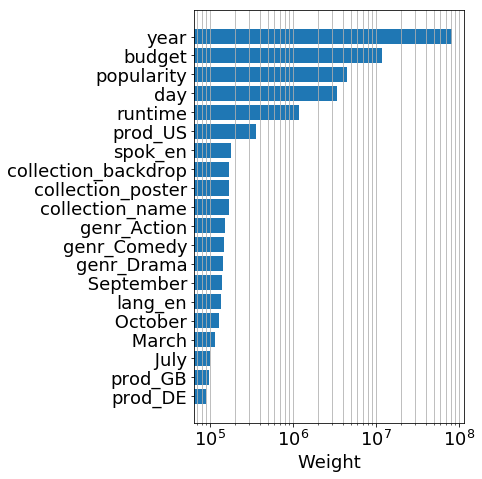

In [899]:
# モデルを選択し、最適なモデルを作成
train_size = len(df_train_raw)/(len(df_train_raw)+len(df_test_raw))
nor = Normalizer()
std = StandardScaler()
lr = LinearRegression()
rid = Ridge()
rfr = RandomForestRegressor()
lgb = LGBMRegressor()
pl = Pipeline(steps=[('pre', nor), ('mod', rid)])

best_mod = Learning(X, y, train_size=train_size, random_state=None).extract(model=pl, n_iter=1, evaluate=True, plot=True)

# Predicting

In [759]:
class Predicting:
    
    def __init__(self, X, y, X_test, model):
        self.X = X
        self.y = y
        self.X_test = X_test
        self.mod = model
        
    def _fit(self):
        self.mod.fit(self.X, self.y)
        
    def _predict(self):
        return self.mod.predict(self.X_test)
    
    def _save(self, df):
        df.to_csv('submit.csv', index=None)
    
    def extract(self, save=True):
        self._fit()
        y = self._predict()
        df = pd.DataFrame(data=y, index=self.X_test.index, columns=['revenue']).reset_index()
        if save: self._save(df)
        return df

In [760]:
df_pred = Predicting(X, y, X_test, best_mod).extract(save=True)

# Investigetion

## Budget

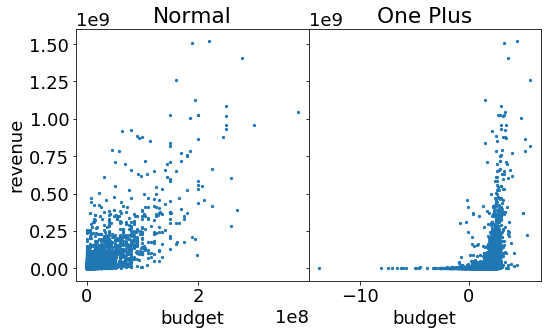

In [201]:
# budgetとrevenueの相関をチェック
x = df_train_raw['budget']
x_log1p = np.log1p(df_train_raw['budget'])
y = df_train_raw['revenue']

fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)

ax1.scatter(x, y, s=5)
ax2.scatter(x_log, y, s=5)

ax1.set_title('Normal')
ax2.set_title('One Plus')
ax1.set_xlabel('budget')
ax2.set_xlabel('budget')
ax1.set_ylabel('revenue')
ax2.tick_params(labelleft=False)
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.show()

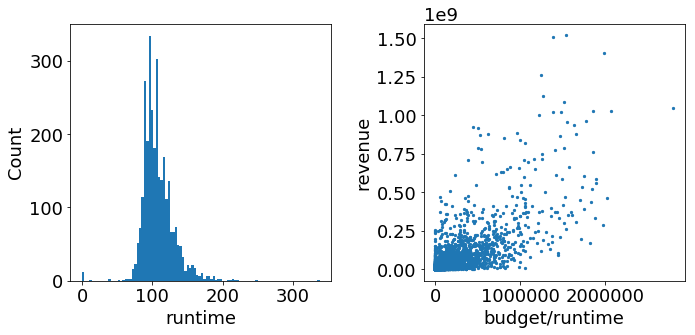

In [185]:
# budget/runtimeとrevenueの相関をチェック
x_hist = df_train_raw['runtime'].fillna(df_train_raw['runtime'].mean())
x = df_train_raw['budget']/df_train_raw['runtime']
y = df_train_raw['revenue']

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(x_hist, bins=100)
ax2.scatter(x, y, s=5)

ax1.set_xlabel('runtime')
ax2.set_xlabel('budget/runtime')
ax1.set_ylabel('Count')
ax2.set_ylabel('revenue')
fig.tight_layout()
fig.show()

## Popularity

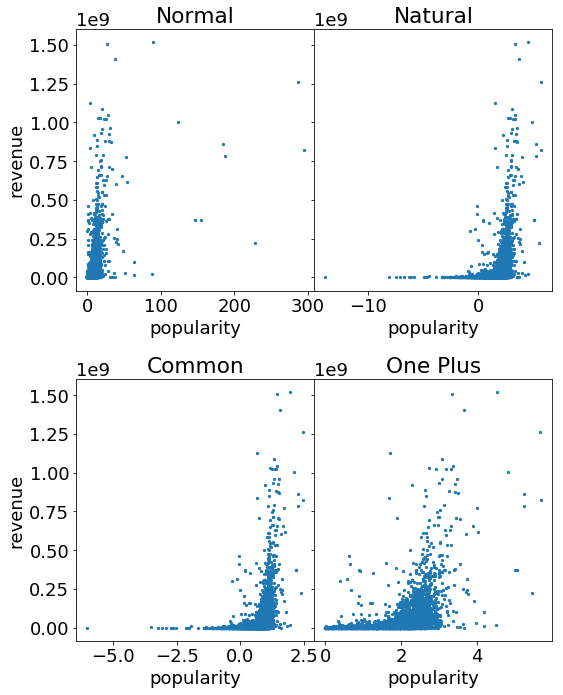

In [222]:
# popularityとrevenueの相関をチェック
x = df_train_raw['popularity']
x_log = np.log(df_train_raw['popularity'])
x_log10 = np.log10(df_train_raw['popularity'])
x_log1p = np.log1p(df_train_raw['popularity'])
y = df_train_raw['revenue']

fig = plt.figure(figsize=(8, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222, sharey=ax1)
ax3 = fig.add_subplot(223, sharey=ax1)
ax4 = fig.add_subplot(224, sharey=ax1)

ax1.scatter(x, y, s=5)
ax2.scatter(x_log, y, s=5)
ax3.scatter(x_log10, y, s=5)
ax4.scatter(x_log1p, y, s=5)

ax1.set_title('Normal')
ax2.set_title('Natural')
ax3.set_title('Common')
ax4.set_title('One Plus')
ax1.set_xlabel('popularity')
ax2.set_xlabel('popularity')
ax3.set_xlabel('popularity')
ax4.set_xlabel('popularity')
ax1.set_ylabel('revenue')
ax2.tick_params(labelleft=False)
ax3.set_ylabel('revenue')
ax4.tick_params(labelleft=False)
fig.tight_layout()
fig.subplots_adjust(wspace=0)
fig.show()